# Python Project - Supermarket Sales Analysis
# Students :
# Zaineh Sbouh 202410377 - Laith Ismail 202411258
This notebook loads the dataset, performs cleaning, exploratory analysis, visualizations, and answers the required analytical questions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("SuperMarket Analysis_ca7c34f4a5b973689fd44eea15001b76.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Inspect data
print("Shape:", df.shape)
display(df.info())
df.describe(include='all')

Shape: (1000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross m

None

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
unique,1000,3,3,2,2,6,NaN,NaN,NaN,NaN,89,506,3,NaN,NaN,NaN,NaN
top,849-09-3807,Alex,Yangon,Member,Female,Fashion accessories,NaN,NaN,NaN,NaN,2/7/2019,7:48:00 PM,Ewallet,NaN,NaN,NaN,NaN
freq,1,340,340,565,571,178,NaN,NaN,NaN,NaN,20,7,345,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55.672130,5.510000,15.379369,322.966749,NaN,NaN,NaN,307.58738,4.761905e+00,15.379369,6.97270
std,NaN,NaN,NaN,NaN,NaN,NaN,26.494628,2.923431,11.708825,245.885335,NaN,NaN,NaN,234.17651,6.131498e-14,11.708825,1.71858
min,NaN,NaN,NaN,NaN,NaN,NaN,10.080000,1.000000,0.508500,10.678500,NaN,NaN,NaN,10.17000,4.761905e+00,0.508500,4.00000
25%,NaN,NaN,NaN,NaN,NaN,NaN,32.875000,3.000000,5.924875,124.422375,NaN,NaN,NaN,118.49750,4.761905e+00,5.924875,5.50000
50%,NaN,NaN,NaN,NaN,NaN,NaN,55.230000,5.000000,12.088000,253.848000,NaN,NaN,NaN,241.76000,4.761905e+00,12.088000,7.00000
75%,NaN,NaN,NaN,NaN,NaN,NaN,77.935000,8.000000,22.445250,471.350250,NaN,NaN,NaN,448.90500,4.761905e+00,22.445250,8.50000


In [ ]:
# Check missing values
missing = df.isna().sum().sort_values(ascending=False)
missing.head(20)

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


In [ ]:
# Data type adjustments
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time']).dt.time

# confirm
df[['Date','Time']].head()

/tmp/ipython-input-59687716.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time']).dt.time


,Date,Time
0,2019-01-05,13:08:00
1,2019-03-08,10:29:00
2,2019-03-03,13:23:00
3,2019-01-27,20:33:00
4,2019-02-08,10:37:00


## Exploratory analysis (basic statistics)
We compute mean, median, min, max, and count of **Sales** grouped by Branch, Customer type, Gender, and Payment.

In [ ]:
def sales_stats(group_col):
    g = df.groupby(group_col)['Sales']
    out = pd.DataFrame({
        'mean': g.mean(),
        'median': g.median(),
        'min': g.min(),
        'max': g.max(),
        'count': g.count()
    }).reset_index()
    return out.sort_values('mean', ascending=False)

for col in ['Branch','Customer type','Gender','Payment']:
    print("\n=== Sales stats by", col, "===")
    display(sales_stats(col))


=== Sales stats by Branch ===


,Branch,mean,median,min,max,count
2,Giza,337.099715,271.41975,10.6785,1042.65,328
1,Cairo,319.872506,252.88200,18.6375,1022.49,332
0,Alex,312.354031,240.82800,12.6945,1039.29,340



=== Sales stats by Customer type ===


,Customer type,mean,median,min,max,count
0,Member,335.742945,271.950,10.6785,1042.65,565
1,Normal,306.372379,225.792,12.6945,1039.29,435



=== Sales stats by Gender ===


,Gender,mean,median,min,max,count
0,Female,340.931414,284.193,12.6945,1042.65,571
1,Male,299.055738,214.746,10.6785,1039.29,429



=== Sales stats by Payment ===


,Payment,mean,median,min,max,count
0,Cash,326.181890,262.962,10.6785,1003.59,344
1,Credit card,324.009878,239.589,12.6945,1042.65,311
2,Ewallet,318.820600,253.680,13.4190,1034.46,345


## Visualizations
The project requires at least 6 professional visualizations.

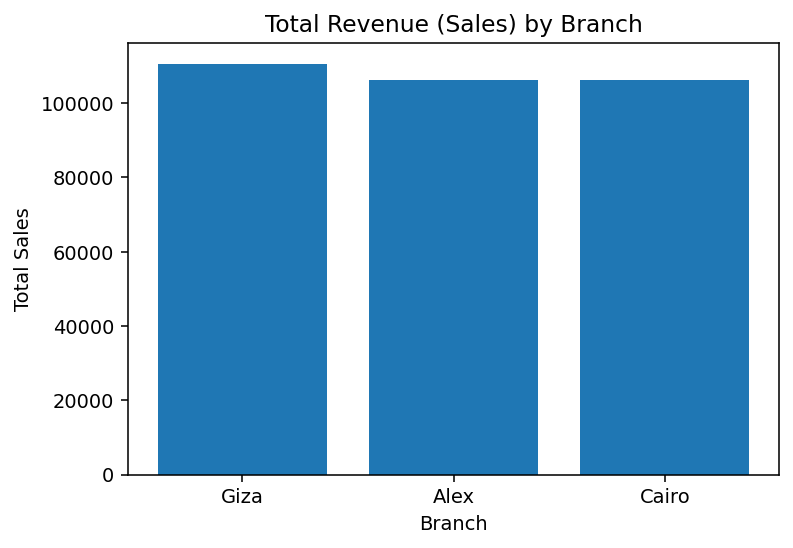

In [ ]:
plt.rcParams.update({'figure.dpi': 140})

# 1) Total revenue by branch
branch_rev = df.groupby('Branch')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(6,4))
plt.bar(branch_rev.index, branch_rev.values)
plt.title('Total Revenue (Sales) by Branch')
plt.xlabel('Branch'); plt.ylabel('Total Sales')
plt.show()

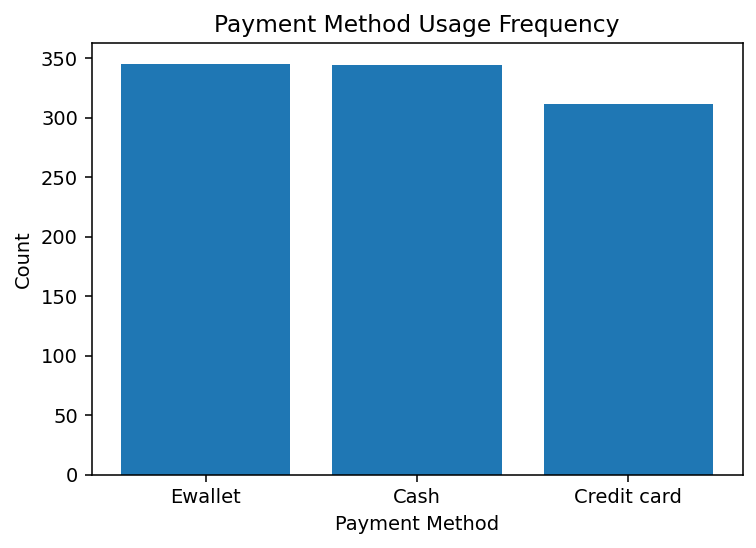

In [ ]:
# 2) Payment method frequency
payment_counts = df['Payment'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(payment_counts.index, payment_counts.values)
plt.title('Payment Method Usage Frequency')
plt.xlabel('Payment Method'); plt.ylabel('Count')
plt.show()

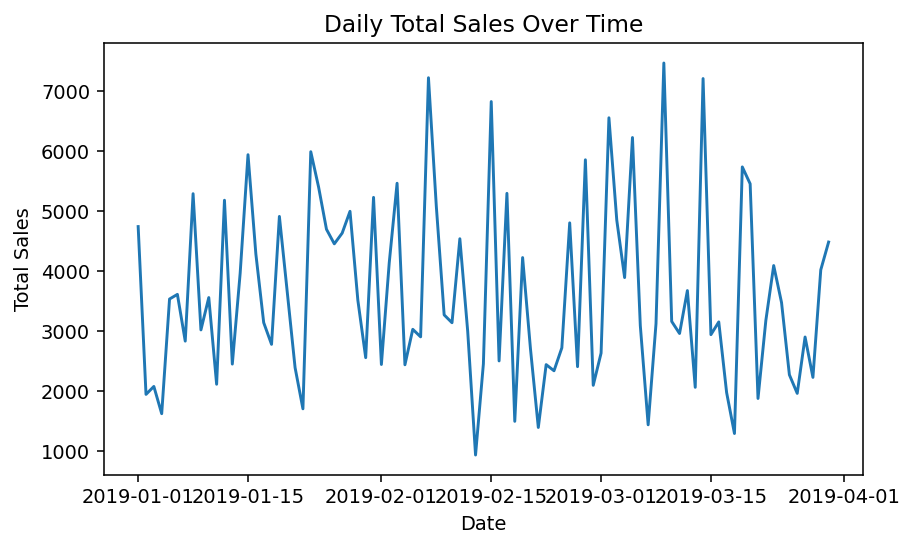

In [ ]:
# 3) Line plot of sales over time (daily)
daily_sales = df.groupby('Date')['Sales'].sum().sort_index()
plt.figure(figsize=(7,4))
plt.plot(daily_sales.index, daily_sales.values)
plt.title('Daily Total Sales Over Time')
plt.xlabel('Date'); plt.ylabel('Total Sales')
plt.show()

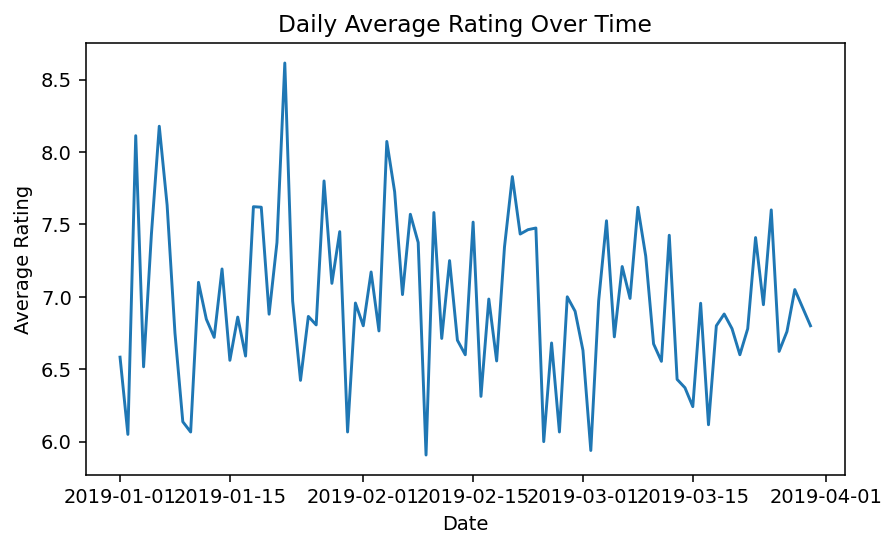

In [ ]:
# 4) Rating trends over time (daily average)
daily_rating = df.groupby('Date')['Rating'].mean().sort_index()
plt.figure(figsize=(7,4))
plt.plot(daily_rating.index, daily_rating.values)
plt.title('Daily Average Rating Over Time')
plt.xlabel('Date'); plt.ylabel('Average Rating')
plt.show()

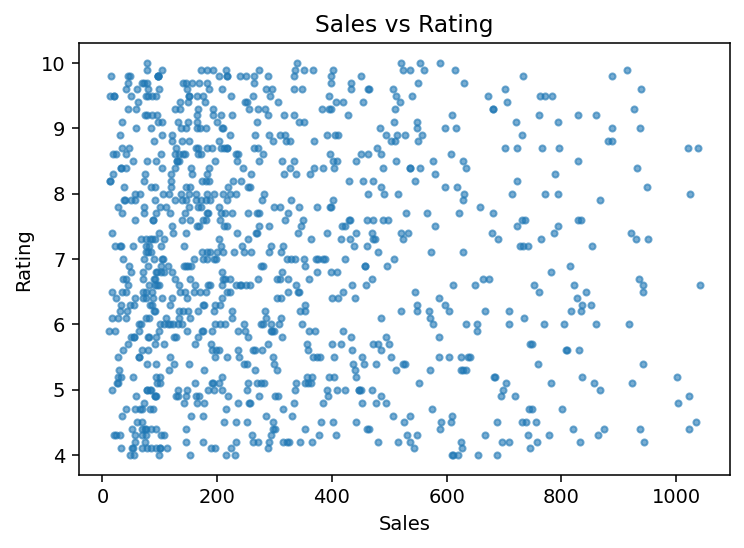

In [ ]:
# 5) Scatter plot of Sales vs Rating
plt.figure(figsize=(6,4))
plt.scatter(df['Sales'], df['Rating'], s=10, alpha=0.6)
plt.title('Sales vs Rating')
plt.xlabel('Sales'); plt.ylabel('Rating')
plt.show()

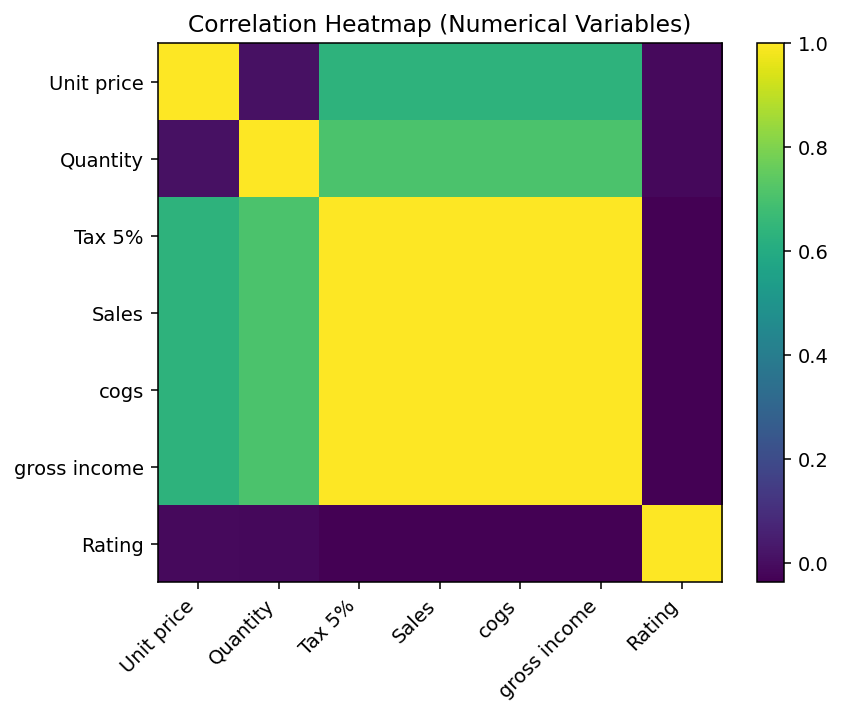

In [ ]:
# 6) Correlation heatmap of numerical variables
num_cols = ['Unit price','Quantity','Tax 5%','Sales','cogs','gross income','Rating']
corr = df[num_cols].corr()

plt.figure(figsize=(6.5,5))
plt.imshow(corr, aspect='auto')
plt.xticks(range(len(num_cols)), num_cols, rotation=45, ha='right')
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Correlation Heatmap (Numerical Variables)')
plt.colorbar()
plt.show()

/tmp/ipython-input-4131849346.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=prod_lines)


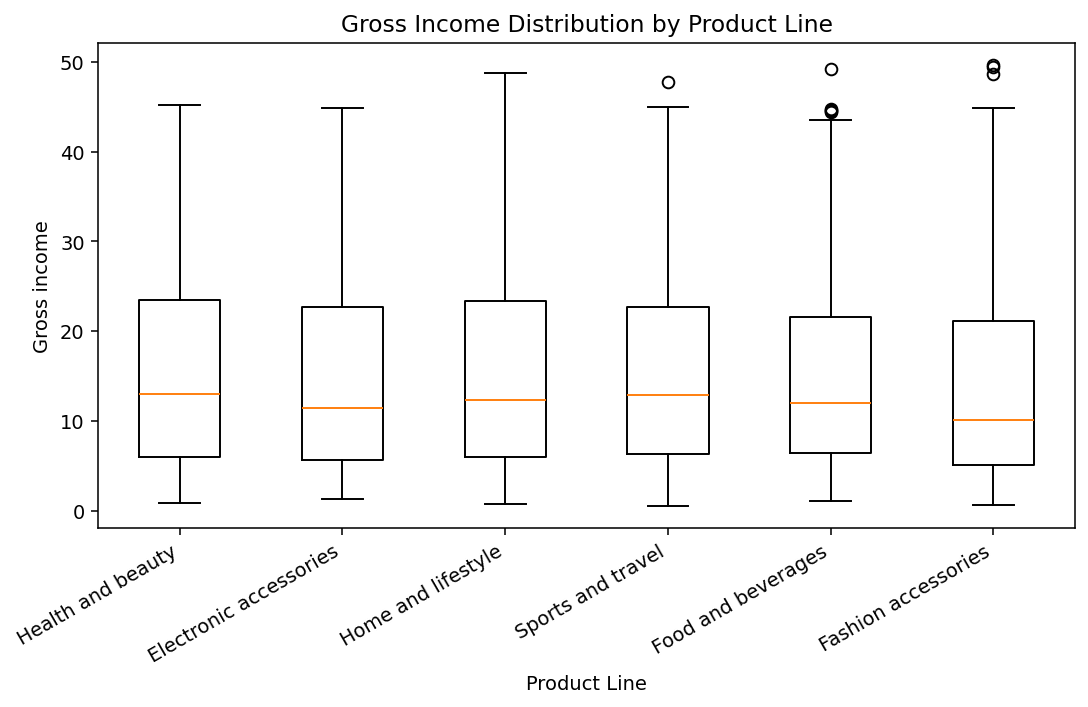

In [ ]:
# 7) Box plot of gross income grouped by Product line
prod_lines = df['Product line'].unique()
data = [df.loc[df['Product line']==pl, 'gross income'] for pl in prod_lines]

plt.figure(figsize=(9,4.5))
plt.boxplot(data, labels=prod_lines)
plt.title('Gross Income Distribution by Product Line')
plt.xlabel('Product Line'); plt.ylabel('Gross income')
plt.xticks(rotation=30, ha='right')
plt.show()

## Advanced Questions (answers)

In [ ]:
# Q1: Which branch generates the highest revenue?
branch_rev = df.groupby('Branch')['Sales'].sum().sort_values(ascending=False)
top_branch = branch_rev.index[0]
top_branch, branch_rev[top_branch]

('Giza', np.float64(110568.7065))

In [ ]:
# Q2: Do members spend more than normal customers?
avg_by_type = df.groupby('Customer type')['Sales'].mean().sort_values(ascending=False)
avg_by_type

,Sales
Customer type,
Member,335.742945
Normal,306.372379


In [ ]:
# Q3: Which payment method has the highest usage?
payment_counts = df['Payment'].value_counts()
payment_counts

,count
Payment,
Ewallet,345
Cash,344
Credit card,311


In [ ]:
# Q4: Which product line has the highest average rating?
product_rating = df.groupby('Product line')['Rating'].mean().sort_values(ascending=False)
product_rating

,Rating
Product line,
Food and beverages,7.113218
Fashion accessories,7.029213
Health and beauty,7.003289
Electronic accessories,6.924706
Sports and travel,6.916265
Home and lifestyle,6.837500


In [ ]:
# Q5: Relationship between unit price and quantity purchased?
corr_unit_qty = df[['Unit price','Quantity']].corr().iloc[0,1]
corr_unit_qty

np.float64(0.010777564342497253)

### Interpretation (write in report)
- **Q1**: Choose the top branch and provide likely reasons (higher traffic, larger baskets).
- **Q2**: Compare Member vs Normal mean sales.
- **Q3**: Use highest count from payment_counts.
- **Q4**: Use top of product_rating.
- **Q5**: If correlation is close to 0, relationship is weak.
